100%|██████████| 345M/345M [00:21<00:00, 15.9MB/s]


Extracting flowers/flowers-102/102flowers.tgz to flowers/flowers-102


100%|██████████| 502/502 [00:00<00:00, 1.02MB/s]


100%|██████████| 15.0k/15.0k [00:00<00:00, 21.3MB/s]


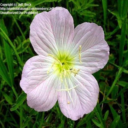

In [2]:
import torchvision
import torch
from PIL import Image

# Create a vector of zeros of size 5
size = (128, 128)
transform = torchvision.transforms.Compose([torchvision.transforms.Resize(size), torchvision.transforms.ToTensor()])
train_dataset = list(torchvision.datasets.Flowers102('./flowers', 'train', transform=transform, download=True))
test_dataset = list(torchvision.datasets.Flowers102('./flowers', 'test', transform=transform, download=True))

def visualize_image(img: torch.Tensor) -> Image.Image:
    return Image.fromarray((img.permute(1, 2, 0) * 255).to(torch.uint8).numpy())

visualize_image(train_dataset[1][0])

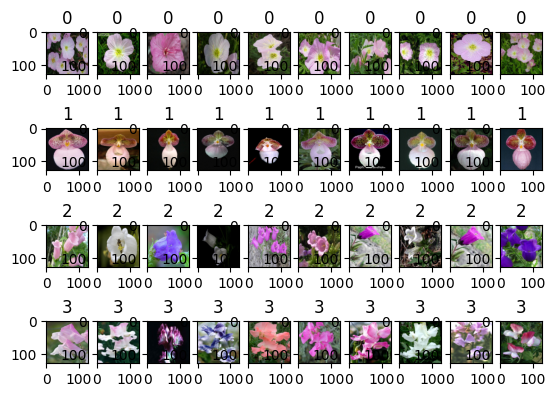

In [3]:
import matplotlib.pyplot as plt
f, ax = plt.subplots (4, 10)
for i, (im, label) in enumerate(train_dataset[:40]):
    ax[i // 10, i % 10].imshow(visualize_image(im))
    ax[i // 10, i % 10].set_title(label)

class_01 = train_dataset[:20]

In [6]:
train_images = torch.stack([im for im, _ in train_dataset], dim=0)
train_label = torch.tensor([label for _, label in train_dataset])

if torch.cuda.is_available():
  train_images, train_label = train_images.cuda(), train_label.cuda()

In [7]:
model = torch.nn.Linear(128*128*3, 102)

if torch.cuda.is_available():
  model.cuda()

loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)